### 评价方式
- 准确率
- 精准率
- 召回率
- f1- score
- auc曲线
### 混淆矩阵（Confusion Matrix）
混淆矩阵是能够比较全面的反映模型的性能，从混淆矩阵能够衍生出很多的指标来。

| 真实值 \ 预测结果     | 正例       | 反例    |
| :---    |    :---:   |   ---:  |
| 正例    | 真正例 TP    | 伪反例 FN  |
| 反例    | 伪正例 FP    | 真反例 TN  |

#### 精准率：
- Precision = TP / (TP+FP)；
- API: accuracy_score

#### 召回率：（较多被使用）
- Recal = TP/(TP+FN)
- 解释：真正为正例的样本中预测结果为正例的比例。正样本有多少被找出来了（召回了多少）
- 例子：医院预测一个病人是否患有癌症。假设有100个测试样本（10个癌症患者，90个非癌症患者），最终预测结果为6个癌症患者，94个非癌症患者。召回率就是在10癌症患者中预测正确多少个，或者说在癌症患者中预测出癌症患者的比例（预测出的癌症患者/所有癌症患者（预测正确的+预测错误的））。
  - 使用场景：
    - 是否患癌症
    - 产品是否为残次品
- 是真实类别为正例且预测类别也为正例的样本数与真实类别为正例的样本数的比值
- API: recall_score
#### 准确率：
- Accuracy = (TP+TN) / (TP+FP+TN+FN) 
- 模型： .score()返回的就是模型准确率

#### F值（F1-scores）：Precision和Recall加权调和平均数，并假设两者一样重要。
- F1-score = (2Recall*Precision) / (Recall + Precision)
- 人们通常用准确率和召回率两个指标来评价模型分析效果，但两指标冲突时，AB模型哪个更优呢？
||准确率|召回率|
|:---|:---|:---|
|A|80%|90% |
|B|90%|80% |
- 需要用 f1-score作为测评方法，它是Precision和Recall加权调和平均数,最大值为1， 最小值为0
$$f1-score = \frac{1}{\frac{1}{recall}+\frac{1}{precision}} = \frac{2 * pre * recall}{pre + recall} $$
- 反应了模型稳健性
- 是一个综合的评判标准
- API： f1_score()
##### 查准率(precision)和查全率(recall)是一对矛盾的度量。一般来说，查准率高时，查全率往往偏低；而查全率高时，查准率往往偏低。通常只有在一些简单任务中，才可能使二者都很高。

### ROC曲线和AUC
- AUC是一个模型评价指标，只能用于二分类模型的评价。该评价指标通常应用的比较多！
- 应用的比较多是原因是因为很多的机器学习的分类模型计算结果都是概率的形式（比如逻辑回归），那么对于概率而言，我们就需要去设定一个阈值来判定分类，那么这个阈值的设定就会对我们的正确率和准确率造成一定成都的影响。
- 逻辑回归的默认阈值为0.5

- 根据混淆矩阵，我们可以得到另外两个指标：

- 真正例率，True Positive Rate：TPR = TP/ (TP+FN)

- 假正例率， False Postive Rate：FPR = FP/(TN+FP)

- 另外，真正率是正确预测到的正例数与实际正例数的比值，所以又称为灵敏度（敏感性，sensitive）；

- 对应于灵敏度有一个特异度（特效性，specificity）是正确预测到的负例数与实际负例数的比值（NPV = TN / (TN+FN)）。

- 我们以真正例率（TPR）作为纵轴，以假正例率（FPR）作为横轴作图，便得到了ROC曲线，而AUC则是ROC曲线下的面积。AUC的取值为[0.5-1]，0.5对应于对角线的“随机猜测模型”。
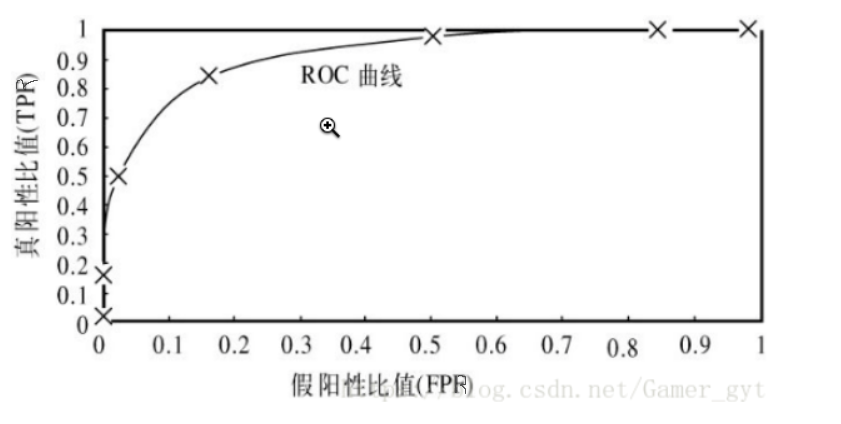
- 在理想情况下，最佳的分类器应该尽可能地处于左上角，这就意味着分类器在伪反例率（预测错的概率）很低的同时获得了很高的真正例率（预测对的概率）。也就是说ROC曲线围起来的面积越大越好，因为ROC曲线面积越大，则曲线上面的面积越小，则分类器越能停留在ROC曲线的左上角。
- AUC的的取值是固定在0-1之间。AUC的值越大越好。


- TPR越大越好，FPR越小越好，AUC 取值【0，1】，越大越好
- AUC值是一个概率值，当你随机挑选一个正样本以及负样本，当前的分类算法根据计算得到的Score值将这个正样本排在负样本前面的概率就是AUC值，AUC值越大，当前分类算法越有可能将正样本排在负样本前面，从而能够更好地分类。例如一个模型的AUC是0.7，其含义可以理解为：给定一个正样本和一个负样本，在70%的情况下，模型对正样本的打分（概率）高于对负样本的打分。

- 那么为什么要用AUC作为二分类模型的评价指标呢？为什么不直接通过计算准确率来对模型进行评价呢？

- 因为机器学习中的很多模型对于分类问题的预测结果大多是概率，即属于某个类别的概率，如果计算准确率的话，就要把概率转化为类别，这就需要设定一个阈值，概率大于某个阈值的属于一类，概率小于某个阈值的属于另一类，而阈值的设定直接影响了准确率的计算。也就是说AUC越高说明阈值分割所能达到的准确率越高。
- AUC API;
  - from sklearn.metrics import roc_auc_score
  - y_pre = predict_proba(x_text)#返回预测的概率
  - auc = roc_auc_score(y_test,y_pre[:,1])# 有两列，正例和反例， 只取出来一列就可以

### PR曲线
- P-R曲线的P就是查准率（Precision），R就是查全率（Recall）。以P作为横坐标，R作为纵坐标，就可以画出P-R曲线。

- 对于同一个模型，通过调整分类阈值，可以得到不同的P-R值，从而可以得到一条曲线（纵坐标为P，横坐标为R）。通常随着分类阈值从大到小变化（大于阈值认为P），Precision减小，Recall增加。比较两个分类器好坏时，显然是查得又准又全的比较好，也就是的PR曲线越往坐标（1，1）的位置靠近越好。若一个学习器的P-R曲线被另一个学习器完全”包住”，则后者的性能优于前者。当存在交叉时，可以计算曲线围住面积，不太容易判断，但是可以通过平衡点（查准率=查全率，Break-Even Point，BEP）来判断。

- 下图中，基于BEP的比较，可以认为模型A优于模型B。
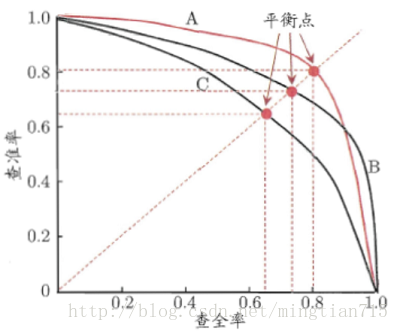
 

In [10]:
from sklearn.metrics import recall_score,accuracy_score,f1_score,roc_auc_score
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
iris = datasets.load_iris()
feature = iris.data
target = iris.target
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2020)
l = LogisticRegression()
l.fit(x_train,y_train)

LogisticRegression()

In [6]:
#准确率
l.score(x_test,y_test)

0.8666666666666667

In [7]:
#精准率
y_pred = l.predict(x_test)
accuracy_score(y_test,y_pred)

0.8666666666666667

In [8]:
#召回率
recall_score(y_test,y_pred,average='macro')

0.8666666666666667

In [9]:
# f1-score
f1_score(y_test,y_pred,average='macro')

0.8666666666666667

In [11]:
l.predict_proba(x_test) #不是二分类！ 不能用AUC

array([[1.03388410e-05, 2.32785295e-02, 9.76711132e-01],
       [9.69926338e-01, 3.00735408e-02, 1.21204013e-07],
       [2.10261325e-02, 8.69133459e-01, 1.09840408e-01],
       [3.62468987e-03, 7.92131911e-01, 2.04243399e-01],
       [7.91633303e-03, 8.00650398e-01, 1.91433269e-01],
       [7.29336165e-04, 6.60855629e-01, 3.38415035e-01],
       [1.68650304e-04, 1.86234353e-01, 8.13596997e-01],
       [1.06773855e-01, 8.90961843e-01, 2.26430208e-03],
       [9.47040311e-01, 5.29584945e-02, 1.19445653e-06],
       [9.62456768e-01, 3.75428428e-02, 3.89516934e-07],
       [1.19609796e-04, 1.38767647e-01, 8.61112743e-01],
       [8.77313770e-03, 6.97026811e-01, 2.94200052e-01],
       [9.74000479e-01, 2.59993991e-02, 1.21851736e-07],
       [1.78574102e-03, 4.79369510e-01, 5.18844749e-01],
       [5.56416695e-04, 2.46559652e-01, 7.52883931e-01],
       [9.83591462e-01, 1.64084472e-02, 9.08262759e-08],
       [1.65037341e-02, 9.54733013e-01, 2.87632526e-02],
       [9.01824964e-03, 7.82727

In [12]:
# auc

roc_auc_score(y_test,l.predict_proba(x_test)[:,1])

ValueError: multi_class must be in ('ovo', 'ovr')

### PR曲线与ROC曲线对比
- 与PR曲线相比，相对来讲ROC曲线会更稳定，在正负样本量都足够的情况下，ROC曲线足够反映模型的判断能力。而在正负样本分布得极不均匀(highly skewed datasets)的情况下（正样本极少），PRC比ROC能更有效地反映分类器对于整体分类情况的好坏。

- 总之，只画一个曲线时，如果没有data imbalance,倾向于用ROC（更简洁，更好理解）。如果数据样本不均衡,分两种情况：

  - 情况1：如正样本远小于负样本，PRC更敏感，因为用到了precision=(TP/(TP+FP))。

  - 情况2：正样本远大于负样本，PRC和ROC差别不大，都不敏感。

- 对于同一模型，PRC和ROC曲线都可以说明一定的问题，而且二者有一定的相关性，如果想评测模型效果，也可以把两条曲线都画出来综合评价。

### KS曲线
- KS曲线又叫洛伦兹曲线。以TPR和FPR分别作为纵轴，以阈值作为横轴，画出两条曲线。KS曲线则是两条曲线的在每一个阈值下的差值。
- KS（Kolmogorov-Smirnov）值，KS=max(TPR-FPR)，即为TPR与FPR的差的最大值；
- KS值可以反映模型的最优区分效果，此时所取的阈值一般作为定义好坏用户的最优阈值。KS值越大，模型的预测准确性越好。KS值的取值范围是[0，1] ，一般，KS>0.2即可认为模型有比较好的预测准确性。

- KS<0.2：模型无鉴别能力；

- 0.2-0.4之间，模型勉强接受；

- 0.41-0.5之间，模型具有区别能力；

- 0.51-0.6之间，模型有很好的区别能力；

- 0.61-0.75之间，模型有非常好的区别能力；

- KS>0.75，模型异常，很有可能有问题。

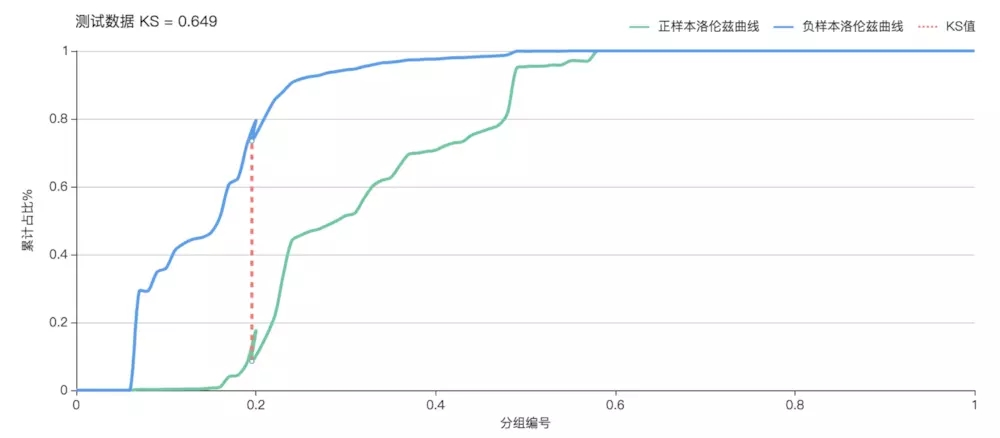
- 由于KS值能找出模型中差异最大的一个分段，因此适合用于找阈值（cut_off），像评分卡这种就很适合用KS值来评估。但是KS值只能反映出哪个分段是区分最大的，而不能总体反映出所有分段的效果，因果AUC值更能胜任。 一般如果是如果任务更关注负样本，那么区分度肯定就很重要，此时K-S比AUC更合适用作模型评估，如果没什么特别的影响，那么就用AUC。